# analysis on  'Sociodemographic inequalities in suicides in England and Wales: 2011 to 2021' dataset.

## Introduction

The aim  of this analysis is to look at suicide cases in England and Wales. It focuses on how suicide rates differ by ethnicity, gender, age, and disability status.


# 1. Install and Import Required Libraries

In this section, I install and import the necessary Python libraries used in the analysis. I also run a few simple test commands to ensure the libraries are installed correctly and working as expected.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    

In [6]:
print(pd.__version__)

2.2.3


In [7]:
print(np.__version__)

2.2.5


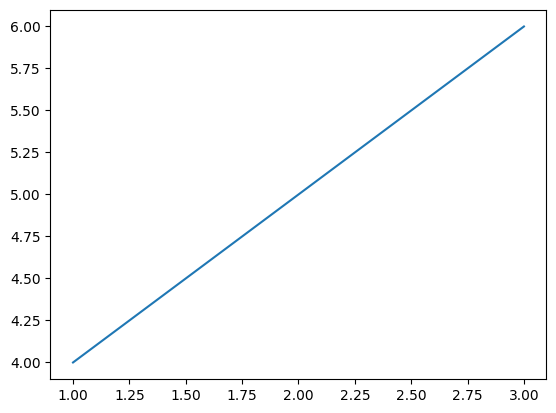

In [8]:
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

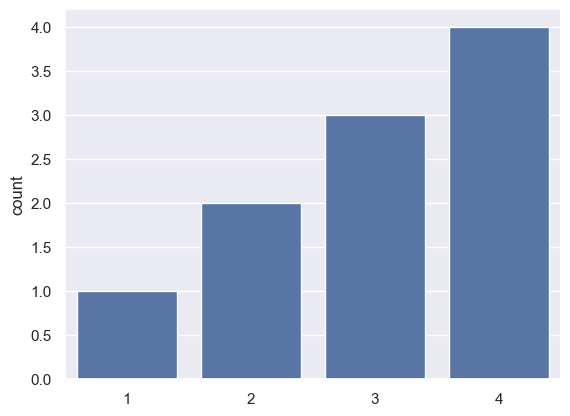

In [9]:
sns.set(style="darkgrid")
sns.countplot(x=[1, 2, 2, 3, 3, 3, 4, 4, 4, 4])
plt.show()

In [10]:
!pip install pandas openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
print("openpyxl is installed!")

openpyxl is installed!


# 2.Data Cleanign: 

In this section, I load the dataset and perform data cleaning tasks. This includes grouping data  and removing  missing values to ensure the dataset is clean and ready for analysis.


In [12]:
file_path = 'sociodemograpgicinequalitiesinsuicidesdataset20230306correction.xlsx' 

In [13]:
df = pd.read_excel(file_path, sheet_name='Table 2')  #The Excel file contains multiple sheets, but I only need the data from the sheet named "Table 2".
# Therefore, I specify the sheet name when loading the file.



In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Characteristics of study population and number of deaths  58 non-null     object
 1   Unnamed: 1                                                56 non-null     object
 2   Unnamed: 2                                                56 non-null     object
 3   Unnamed: 3                                                56 non-null     object
 4   Unnamed: 4                                                56 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Characteristics of study population and number of deaths  58 non-null     object
 1   Unnamed: 1                                                56 non-null     object
 2   Unnamed: 2                                                56 non-null     object
 3   Unnamed: 3                                                56 non-null     object
 4   Unnamed: 4                                                56 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB


In [16]:
df.columns = df.iloc[0]  #The Excel sheet included extra information at the top that wasn't needed. To fix this, 
#I replaced the default column names with the values from the first row, which contained the actual headers.


In [17]:
df = df.drop(0).reset_index(drop=True)

In [18]:
df.head()

,This worksheet contains 1 table.,NaN,NaN,NaN,NaN
0,Source: 2011 Census and death registration dat...,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Exposure,Group,Population size,Number of suicide deaths,Number of deaths from all other causes
3,Ethnicity,Arab,97134,26,1893
4,Ethnicity,"Caribbean, African, Black British and other Black",961055,455,33096


In [19]:
df = df.dropna(how='all') # to remove empty rows from the  dataFrame


In [20]:
df.head(10)

,This worksheet contains 1 table.,NaN,NaN,NaN,NaN
0,Source: 2011 Census and death registration dat...,NaN,NaN,NaN,NaN
2,Exposure,Group,Population size,Number of suicide deaths,Number of deaths from all other causes
3,Ethnicity,Arab,97134,26,1893
4,Ethnicity,"Caribbean, African, Black British and other Black",961055,455,33096
5,Ethnicity,Chinese,257520,116,5616
6,Ethnicity,Indian,919616,561,31007
7,Ethnicity,Mixed/multiple ethnic groups,457277,592,13475
8,Ethnicity,Other ethnic group,166824,107,4304
9,Ethnicity,Pakistani and other Asian/Asian British,1258557,470,32465
10,Ethnicity,White,31018933,33601,2028203


In [21]:
df = df.drop([0, 2,])

In [22]:
df = df.reset_index(drop=True)

In [23]:
df.columns = ['Exposure', 'Group', 'Population size', 'Number of suicide deaths', 'Number of deaths from all other causes']


In [24]:
df.head()

,Exposure,Group,Population size,Number of suicide deaths,Number of deaths from all other causes
0,Ethnicity,Arab,97134,26,1893
1,Ethnicity,"Caribbean, African, Black British and other Black",961055,455,33096
2,Ethnicity,Chinese,257520,116,5616
3,Ethnicity,Indian,919616,561,31007
4,Ethnicity,Mixed/multiple ethnic groups,457277,592,13475


In [25]:
df.isnull().sum() # Checking for missing values

Exposure                                  0
Group                                     0
Population size                           0
Number of suicide deaths                  0
Number of deaths from all other causes    0
dtype: int64

In [26]:
df.describe()


,Exposure,Group,Population size,Number of suicide deaths,Number of deaths from all other causes
count,55,55,55,55,55
unique,9,55,55,55,55
top,National Statistics Socio-economic classificat...,Arab,97134,26,1893
freq,11,1,1,1,1


In [27]:
df.shape

(55, 5)

In [28]:
df.columns

Index(['Exposure', 'Group', 'Population size', 'Number of suicide deaths',
       'Number of deaths from all other causes'],
      dtype='object')

# 3. Data Analysis

# 3.1 Suicide Rate per 100,000 Population by Ethnicity

In [29]:
ethnicity_df = df[df['Exposure'] == 'Ethnicity'].copy()
 # I filtered the data to keep only the rows where the "Exposure" column is "Ethnicity" and saved this as a new DataFrame called `ethnicity_df` to avoid changing the original data.


In [30]:
ethnicity_df


,Exposure,Group,Population size,Number of suicide deaths,Number of deaths from all other causes
0,Ethnicity,Arab,97134,26,1893
1,Ethnicity,"Caribbean, African, Black British and other Black",961055,455,33096
2,Ethnicity,Chinese,257520,116,5616
3,Ethnicity,Indian,919616,561,31007
4,Ethnicity,Mixed/multiple ethnic groups,457277,592,13475
5,Ethnicity,Other ethnic group,166824,107,4304
6,Ethnicity,Pakistani and other Asian/Asian British,1258557,470,32465
7,Ethnicity,White,31018933,33601,2028203


In [31]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# extra step: 
In this step, I calculated the "suicide rate per 100,000 people" for each group. I did this by dividing the "number of suicide deaths" by the "population size", then multiplying by 100,000 to get the rate per 100,000 people. The result is saved in a new column called "Suicide Rate per 100,000 "in the (ethnicity_df DataFrame)- I have done  the same for the  Age group, Sex and disability status. 
# Why:
becasue By using a rate per 100,000 people, i allow for fair comparisons between groups (e.g., ethnicity groups) with different population sizes. 

In [32]:
ethnicity_df['Suicide Rate per 100,000'] = (
    ethnicity_df['Number of suicide deaths'] / ethnicity_df['Population size']
) * 100000


In [33]:
print(ethnicity_df.columns)


Index(['Exposure', 'Group', 'Population size', 'Number of suicide deaths',
       'Number of deaths from all other causes', 'Suicide Rate per 100,000'],
      dtype='object')


In [34]:
ethnicity_comparison = ethnicity_df.groupby('Group')['Suicide Rate per 100,000'].mean()

In [35]:
ethnicity_df_sorted = ethnicity_comparison.sort_values(ascending=False)

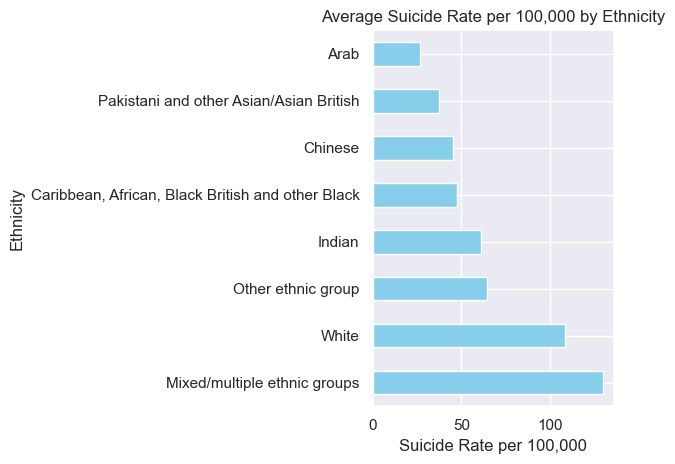

In [36]:
ethnicity_df_sorted.plot(kind='barh', color='skyblue')
plt.title('Average Suicide Rate per 100,000 by Ethnicity')
plt.xlabel('Suicide Rate per 100,000')
plt.ylabel('Ethnicity')
plt.tight_layout()
plt.show()

# 3.2 Suicide Rate per 100,000 Population by Sex

In [37]:
sex_df = df[df['Exposure'] == 'Sex'].copy()

In [38]:
sex_df

,Exposure,Group,Population size,Number of suicide deaths,Number of deaths from all other causes
53,Sex,Female,18173538,9393,926684
54,Sex,Male,16963378,26535,1223375


In [39]:
print(sex_df.head())  
print(sex_df.columns)  # Checking  if the 'Sex' and 'Suicide Rate per 100,000' columns are present


   Exposure   Group Population size Number of suicide deaths  \
53      Sex  Female        18173538                     9393   
54      Sex    Male        16963378                    26535   

   Number of deaths from all other causes  
53                                 926684  
54                                1223375  
Index(['Exposure', 'Group', 'Population size', 'Number of suicide deaths',
       'Number of deaths from all other causes'],
      dtype='object')


In [40]:
sex_df_filtered = sex_df[sex_df['Exposure'] == 'Sex'].copy()

In [41]:
sex_df['Suicide Rate per 100,000'] = (
    sex_df['Number of suicide deaths'] / sex_df['Population size']
) * 100000

In [42]:
print(sex_df_filtered.columns)


Index(['Exposure', 'Group', 'Population size', 'Number of suicide deaths',
       'Number of deaths from all other causes'],
      dtype='object')


In [43]:
sex_df_filtered['Suicide Rate per 100,000'] = (sex_df_filtered['Number of suicide deaths'] / sex_df_filtered['Population size']) * 100000


In [44]:
sex_comparison = sex_df_filtered.groupby('Group')['Suicide Rate per 100,000'].mean() # For the analysis, I compared the mean suicide rate in each group and not  the actual number of suicides.


In [45]:
print(sex_comparison)

Group
Female     51.685038
Male      156.425212
Name: Suicide Rate per 100,000, dtype: object


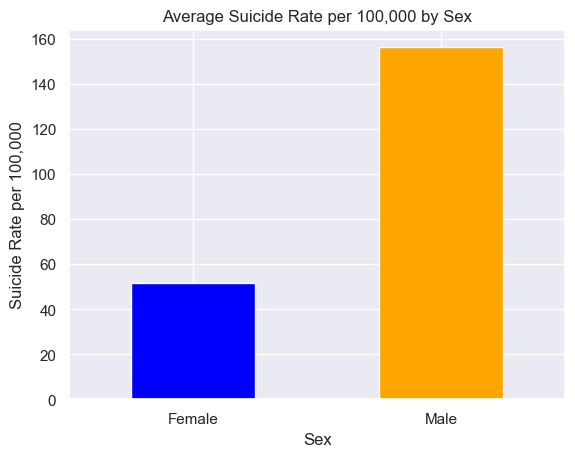

In [46]:
sex_comparison.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Suicide Rate per 100,000 by Sex')
plt.xlabel('Sex')
plt.ylabel('Suicide Rate per 100,000')
plt.xticks(rotation=0)  # Optional: To keep the labels horizontal
plt.show()

# 3.3 Suicide Rate per 100,000 Population by Age group

In [47]:
Age_df= df[df['Exposure'] == 'Age group'].copy()

In [48]:
Age_df

,Exposure,Group,Population size,Number of suicide deaths,Number of deaths from all other causes
23,Age group,18-29,7392373,6627,38232
24,Age group,30-39,6469695,7152,72528
25,Age group,40-49,7515790,9914,198543
26,Age group,50-59,6358710,6874,412186
27,Age group,60-69,5734463,4248,909560
28,Age group,70-79,1665885,1113,519010


In [49]:
print(Age_df.columns)

Index(['Exposure', 'Group', 'Population size', 'Number of suicide deaths',
       'Number of deaths from all other causes'],
      dtype='object')


In [50]:
Age_df['Suicide Rate per 100,000'] = (
    Age_df['Number of suicide deaths'] / Age_df['Population size']
) * 100000

In [51]:
print(Age_df.columns)

Index(['Exposure', 'Group', 'Population size', 'Number of suicide deaths',
       'Number of deaths from all other causes', 'Suicide Rate per 100,000'],
      dtype='object')


In [52]:
Age_comparison= Age_df.groupby('Group')['Suicide Rate per 100,000'].mean () # For the analysis, I compared the mean suicide rate in each group and not  the actual number of suicides.


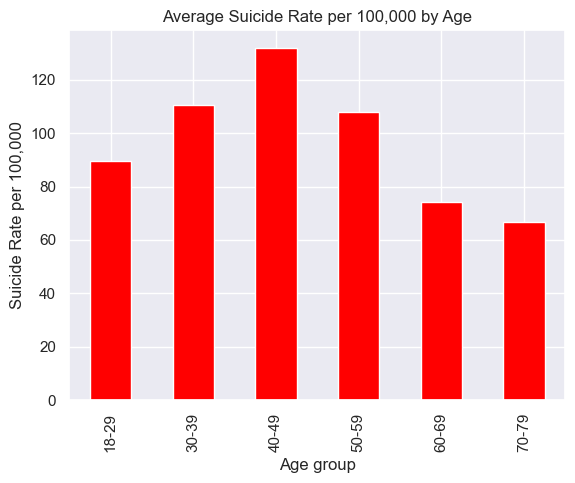

In [53]:
Age_comparison.plot(kind='bar', color=['red'])
plt.title('Average Suicide Rate per 100,000 by Age')
plt.ylabel ('Suicide Rate per 100,000')
plt.xlabel('Age group')
plt.show()

# 3.4 Suicide Rate per 100,000 Population by Disability status.

In [54]:
disability_df= df[df['Exposure'] == 'Disability status'].copy()

In [55]:
print (disability_df.columns)

Index(['Exposure', 'Group', 'Population size', 'Number of suicide deaths',
       'Number of deaths from all other causes'],
      dtype='object')


In [56]:
disability_df['Suicide Rate per 100,000'] = (
    disability_df['Number of suicide deaths'] / disability_df['Population size']
) * 100000

In [57]:
disability_coparison= disability_df.groupby ('Group') ['Suicide Rate per 100,000'].mean () # For the analysis, I compared the mean suicide rate in each group and not  the actual number of suicides.


<function matplotlib.pyplot.show(close=None, block=None)>

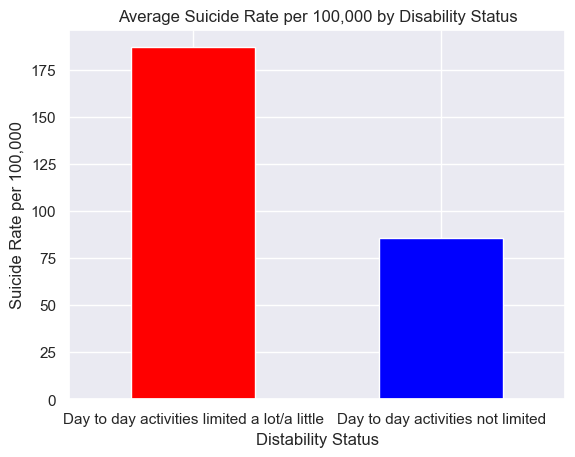

In [58]:
disability_coparison.plot(kind='bar', color=['red','blue'])
plt.title('Average Suicide Rate per 100,000 by Disability Status')
plt.xlabel ('Distability Status')
plt.ylabel ( 'Suicide Rate per 100,000')
plt.xticks(rotation=0) # to keep the labels horizontal
plt.show


# 4. Conclusion

The descriptive data analysis shows that the average suicide rate per 100,000 population is higher among males than females. People in the 40–45 age group have the highest suicide rate compared to other age groups. Additionally, individuals with limited day-to-day activities due to disabilities tend to have a higher suicide rate than those without such limitations.

It is important to note that this analysis is based on simple statistical methods. More advanced statistical testing would be required to thoroughly examine the relationships between different variables and draw more definitive conclusions.
